<a href="https://colab.research.google.com/github/unique-subedi/fruit-ripening-experiment/blob/main/Unique_fruit_ripening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime
import time
import math
import numpy as np
import scipy
from numpy import linalg as LA
import pandas as pd
import urllib.request
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
from scipy.stats import f_oneway

import random

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/unique-subedi/fruit-ripening-experiment/main/data.csv", "data.csv")
urllib.request.urlretrieve("https://raw.githubusercontent.com/unique-subedi/fruit-ripening-experiment/main/banana.csv", "banana.csv")
data = pd.read_csv("data.csv")
banana = pd.read_csv("banana.csv")


In [3]:
df = pd.concat([data, banana.iloc[:,1:]], axis =1)
df

,number,treatment,softness(wed),softness(mon),10-19_r,10-19_g,10-19_b,10-19_magnitude,10-20_r,10-20_g,...,10-22_b,10-22_magnitude,10-23_r,10-23_g,10-23_b,10-23_magnitude,10-24_r,10-24_g,10-24_b,10-24_magnitude
0,1,0,3.0,1.0,142.186631,142.200241,16.844182,201.796117,122.780859,96.179760,...,12.934295,146.366787,116.360128,83.802661,13.796252,144.058675,116.353494,81.629849,11.759836,142.617886
1,2,0,4.0,2.0,137.561795,136.596559,14.987055,194.438883,109.779719,88.955601,...,13.929320,152.601480,120.899058,87.045964,15.229069,149.751483,121.849632,87.021542,14.592494,150.442755
2,3,3,4.0,1.0,141.125241,146.216694,36.481745,206.462037,120.239765,98.022351,...,12.309653,148.847134,126.255641,92.621441,14.366583,157.243814,120.488485,85.541201,10.755849,148.156878
3,4,3,4.0,2.0,125.344966,143.395653,14.991416,191.045587,118.246539,100.222260,...,11.942055,150.629455,121.643766,89.222010,13.653187,151.473372,122.224136,87.660435,10.155163,150.752177
4,5,1,4.0,2.0,116.170423,138.321851,9.094297,180.862401,97.527673,85.330382,...,9.301796,141.101667,111.989788,81.149525,10.709202,138.714257,107.568616,75.318988,8.412993,131.585469
5,6,2,4.0,1.0,115.877324,128.464250,12.384265,173.447363,120.819968,99.005182,...,30.198489,164.245577,121.654618,88.765029,17.154901,151.569678,124.556319,89.114059,11.398168,153.575748
6,7,2,4.0,3.0,102.903835,118.577911,2.553027,157.023687,89.779431,72.036065,...,8.255448,124.110978,97.904951,65.644610,8.660100,118.193027,111.810824,71.090280,8.611368,132.776670
7,8,2,5.0,2.0,114.554244,114.917405,7.570531,162.437674,108.525974,85.527841,...,19.594321,140.666977,103.502055,73.809828,27.221303,130.006020,101.152629,68.741822,23.343351,124.507849
8,9,3,3.0,2.0,122.622167,118.176720,14.859822,170.946621,116.104879,91.190555,...,21.313011,138.965737,110.513696,77.918131,22.986717,137.160130,107.539336,72.991201,19.644453,131.447057
9,10,0,4.0,2.0,138.695419,140.193752,23.083616,198.553671,121.167984,94.246699,...,22.547119,140.493073,112.299085,79.476705,23.701386,139.604394,110.838873,76.421136,22.222250,136.452461


In [4]:
df_fl = df[['number', 'treatment', '10-19_g', '10-19_magnitude', '10-24_g', '10-24_magnitude']]
df_fl.head()
df_fl.loc[:, "green_diff"] =   df_fl["10-19_g"] - df_fl["10-24_g"]
df_fl.loc[:, "magnitude_diff"] =  df_fl["10-19_magnitude"] - df_fl["10-24_magnitude"]
df_fl

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,number,treatment,10-19_g,10-19_magnitude,10-24_g,10-24_magnitude,green_diff,magnitude_diff
0,1,0,142.200241,201.796117,81.629849,142.617886,60.570392,59.178231
1,2,0,136.596559,194.438883,87.021542,150.442755,49.575017,43.996128
2,3,3,146.216694,206.462037,85.541201,148.156878,60.675493,58.305159
3,4,3,143.395653,191.045587,87.660435,150.752177,55.735218,40.293410
4,5,1,138.321851,180.862401,75.318988,131.585469,63.002863,49.276932
5,6,2,128.464250,173.447363,89.114059,153.575748,39.350190,19.871615
6,7,2,118.577911,157.023687,71.090280,132.776670,47.487631,24.247017
7,8,2,114.917405,162.437674,68.741822,124.507849,46.175583,37.929825
8,9,3,118.176720,170.946621,72.991201,131.447057,45.185519,39.499564
9,10,0,140.193752,198.553671,76.421136,136.452461,63.772616,62.101210


In [5]:
def permutation_test(data_set, trt1, trt2,  variable):
   data_slice = data_set[data_set.treatment.isin([trt1, trt2])]
   diff_given = data_slice[data_slice.treatment == trt1][variable].mean() - data_slice[data_slice.treatment == trt2][variable].mean()
   differences = []
   treatments = data_slice["treatment"]
   for perms in itertools.permutations(treatments):
     data_slice.loc[:, "treatment"] = perms
     differences.append(data_slice[data_slice.treatment == trt1][variable].mean() - data_slice[data_slice.treatment == trt2][variable].mean())
   return differences, np.mean(differences >= diff_given)
    
    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0.9


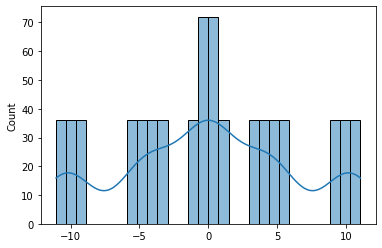

In [6]:
differences, p_value = permutation_test(df_fl, 2, 3, "green_diff")
print(p_value)
sns.histplot(differences, bins = 30, kde= True)

In [7]:
var = "green_diff"
trt_zero = df_fl[df.treatment == 0][var]
trt_one = df_fl[df.treatment == 1][var]
trt_two = df_fl[df.treatment == 2][var]
trt_three = df_fl[df.treatment == 3][var]
F, p = f_oneway(trt_zero, trt_one, trt_two, trt_three)
print("statistic: ", F)
print("p-value: ", p)

statistic:  4.841743371100792
p-value:  0.033102305266664564


In [7]:
def F_statistic(y):
  num = 3*y.groupby(level=0).mean().var()
  denom = y.groupby(level=0).var().sum()/4
  return num/denom



In [11]:
def F_test(y):
    F = F_statistic(y)
    #permutations = random.choices(list(itertools.permutations(y.index)), k = 1000)
    hist = []
    initial = y.index
    i = 0
    for i in range(10000):
      y.index = np.random.permutation(initial)
      hist.append(F_statistic(y))
      F_temp = F_statistic(y)
      i+=1
    return np.mean(hist >= F), hist

In [18]:
df_fl.index = df_fl["treatment"]
p_value, hist = F_test(df_fl["green_diff"])

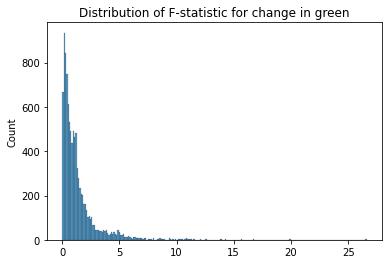

In [19]:
sns.histplot(hist)
plt.title("Distribution of F-statistic for change in green")
plt.savefig("green.png")

In [20]:
p_value

0.0453

In [ ]:
var = "magnitude_diff"
control = df_fl[df_fl.iloc[:,1] == 0]
group1 = df_fl[df_fl.iloc[:,1] == 1]
group2 = df_fl[df_fl.iloc[:,1] == 2]
group3 = df_fl[df_fl.iloc[:,1] == 3]
p_value, test_statistic = F_test(control, group1, group2, group3, var)

nan